In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
finetuned_res = json.load(open("./finetuned_res.json"))

baselines = []
baseline_names = []
deciwatches = []
deciwatch_names = []
uniposes = []
unipose_names = []
uniposes2 = []
unipose2_names = []

models_dict = {"baseline": baselines, "deciwatch": deciwatches, "unipose": uniposes, "unipose2": uniposes2}
modelnames_dict = {"baseline": baseline_names, "deciwatch": deciwatch_names, "unipose": unipose_names, "unipose2": unipose2_names}

for k, v in finetuned_res.items():
    model_type = k.split("_")[0]
    models_dict[model_type].append(v)
    modelnames_dict[model_type].append(k)
    
colors = ["blue", "red", "green", "purple", "orange", "brown"]

In [3]:
no_processing_mean = 0.849

In [4]:
learning_rates = json.load(open("./finetuned_learning_rates.json", "r"))

for k in learning_rates.keys():
    learning_rates[k][0] = [1, [0.001]]

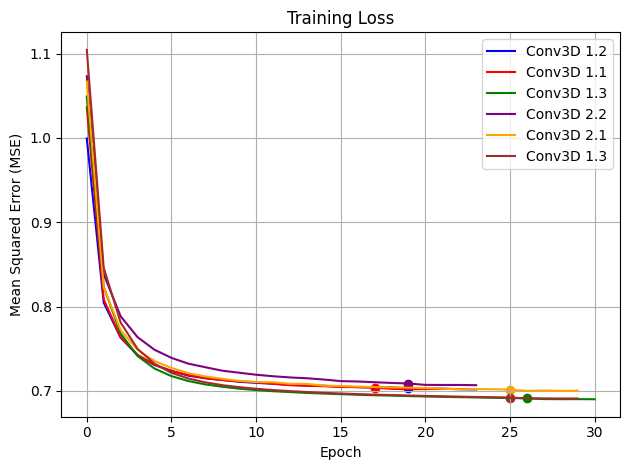

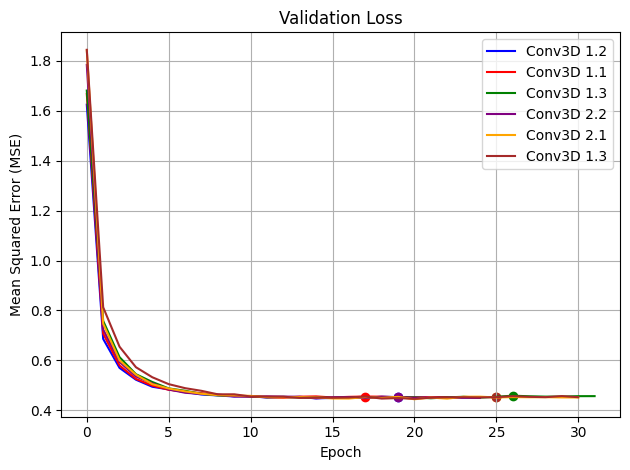

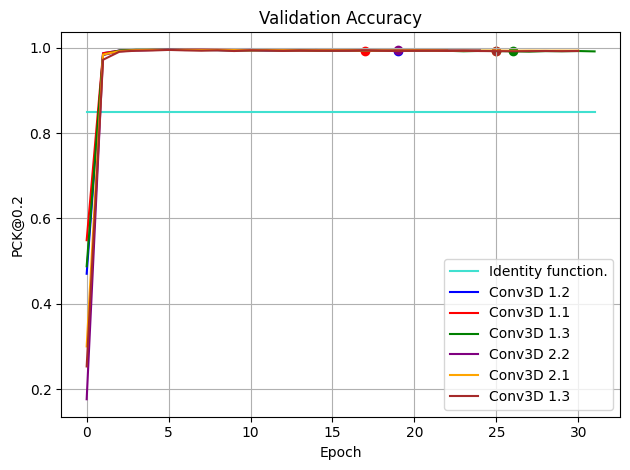

In [5]:
baseline_train_losses = [baseline["train_losses"] for baseline in baselines]
baseline_val_losses = [baseline["val_losses"] for baseline in baselines]
baseline_val_accs = [baseline["val_accs"] for baseline in baselines]
baseline_learning_rates = []
baseline_exps = []
baseline_subexps = []

for baseline_name, baseline in zip(baseline_names, baselines):
    if baseline["config"]["input_name"] == "input_std" and baseline["config"]["interval_skip"] == 0:
        baseline_subexps.append(1)
    elif baseline["config"]["input_name"] == "input_std" and baseline["config"]["interval_skip"] == 1:
        baseline_subexps.append(3)
    elif baseline["config"]["input_name"] == "input" and baseline["config"]["interval_skip"] == 0:
        baseline_subexps.append(2)
    else:
        print("baseline problem")

    baseline_exps.append(baseline["config"]["noise_scalar"])
    baseline_learning_rates.append(learning_rates[baseline_name])
    
baseline_xs = []
baseline_ys = []

for baseline_learning_rate in baseline_learning_rates:
    xs = []
    ys = []
    
    for x, y in baseline_learning_rate:
        y = y[0]
        if y not in ys:
            xs.append(x)
            ys.append(y)
    
    baseline_xs.append(xs)
    baseline_ys.append(ys)
    
plt.figure()
for i, baseline_train_loss in enumerate(baseline_train_losses):
    color = colors[i]
    exp = baseline_exps[i]
    subexp = baseline_subexps[i]
    model_lr_reduction_xs = baseline_xs[i]
    
    plt.plot(np.arange(len(baseline_train_loss)), baseline_train_loss, c=color, label=f"Conv3D {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, baseline_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/baseline/train_losses.png")
plt.show()

plt.figure()
for i, baseline_val_loss in enumerate(baseline_val_losses):
    color = colors[i]
    exp = baseline_exps[i]
    subexp = baseline_subexps[i]
    model_lr_reduction_xs = baseline_xs[i]
    
    plt.plot(np.arange(len(baseline_val_loss)), baseline_val_loss, c=color, label=f"Conv3D {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, baseline_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/baseline/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(baseline_val_accs, key=len))), [no_processing_mean] * len(max(baseline_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, baseline_val_acc in enumerate(baseline_val_accs):
    color = colors[i]
    exp = baseline_exps[i]
    subexp = baseline_subexps[i]
    model_lr_reduction_xs = baseline_xs[i]
    
    plt.plot(np.arange(len(baseline_val_acc)), baseline_val_acc, c=color, label=f"Conv3D {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, baseline_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/baseline/val_accs.png")
plt.show()

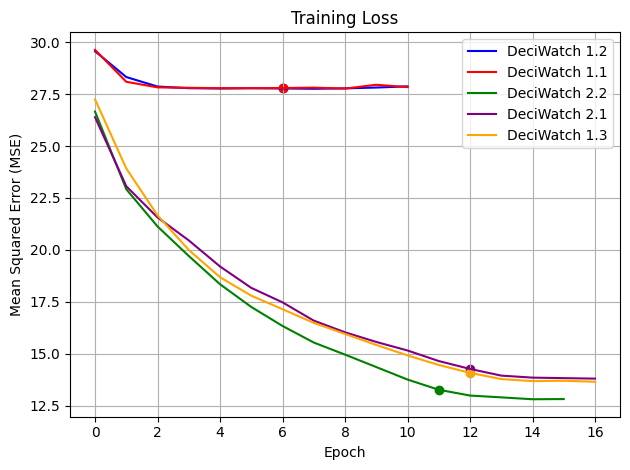

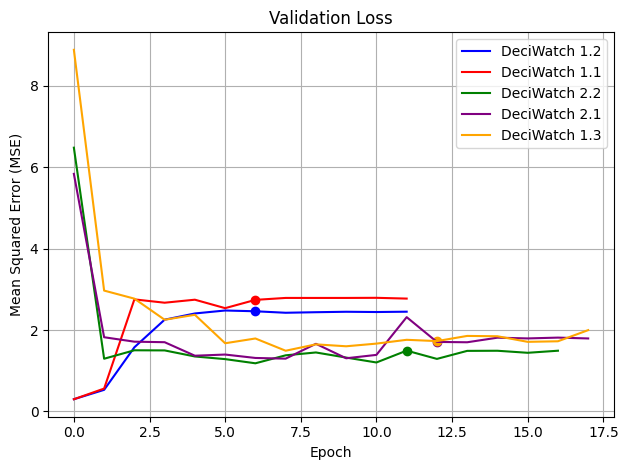

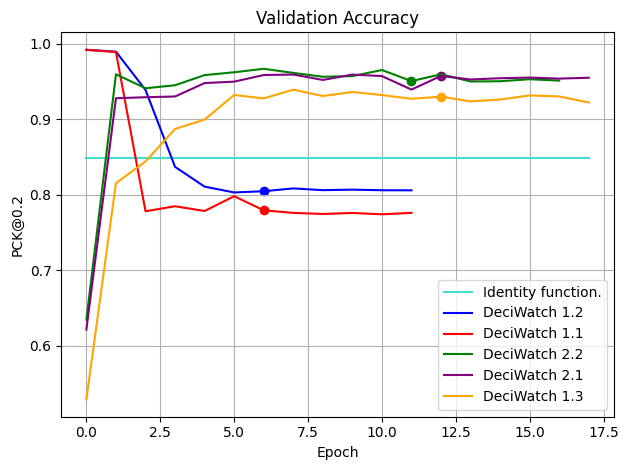

In [6]:
deciwatch_train_losses = [deciwatch["train_losses"] for deciwatch in deciwatches]
deciwatch_val_losses = [deciwatch["val_losses"] for deciwatch in deciwatches]
deciwatch_val_accs = [deciwatch["val_accs"] for deciwatch in deciwatches]
deciwatch_learning_rates = []
deciwatch_exps = []
deciwatch_subexps = []

for deciwatch_name, deciwatch in zip(deciwatch_names, deciwatches):
    if deciwatch["config"]["input_name"] == "input_std" and deciwatch["config"]["interval_skip"] == 0:
        deciwatch_subexps.append(1)
    elif deciwatch["config"]["input_name"] == "input_std" and deciwatch["config"]["interval_skip"] == 1:
        deciwatch_subexps.append(3)
    elif deciwatch["config"]["input_name"] == "input" and deciwatch["config"]["interval_skip"] == 0:
        deciwatch_subexps.append(2)
    else:
        print("deciwatch problem")

    deciwatch_exps.append(deciwatch["config"]["noise_scalar"])
    deciwatch_learning_rates.append(learning_rates[deciwatch_name])
    
deciwatch_xs = []
deciwatch_ys = []

for deciwatch_learning_rate in deciwatch_learning_rates:
    xs = []
    ys = []
    
    for x, y in deciwatch_learning_rate:
        y = y[0]
        if y not in ys:
            xs.append(x)
            ys.append(y)
    
    deciwatch_xs.append(xs)
    deciwatch_ys.append(ys)
    
plt.figure()
for i, deciwatch_train_loss in enumerate(deciwatch_train_losses):
    color = colors[i]
    exp = deciwatch_exps[i]
    subexp = deciwatch_subexps[i]
    model_lr_reduction_xs = deciwatch_xs[i]
    
    plt.plot(np.arange(len(deciwatch_train_loss)), deciwatch_train_loss, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, deciwatch_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/deciwatch/train_losses.png")
plt.show()

plt.figure()
for i, deciwatch_val_loss in enumerate(deciwatch_val_losses):
    color = colors[i]
    exp = deciwatch_exps[i]
    subexp = deciwatch_subexps[i]
    model_lr_reduction_xs = deciwatch_xs[i]
    
    plt.plot(np.arange(len(deciwatch_val_loss)), deciwatch_val_loss, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, deciwatch_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/deciwatch/val_losses.png")
plt.show()

plt.figure()

plt.plot(np.arange(0, len(max(deciwatch_val_accs, key=len))), [no_processing_mean] * len(max(deciwatch_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, deciwatch_val_acc in enumerate(deciwatch_val_accs):
    color = colors[i]
    exp = deciwatch_exps[i]
    subexp = deciwatch_subexps[i]
    model_lr_reduction_xs = deciwatch_xs[i]
    
    plt.plot(np.arange(len(deciwatch_val_acc)), deciwatch_val_acc, c=color, label=f"DeciWatch {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, deciwatch_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/deciwatch/val_accs.png")
plt.show()

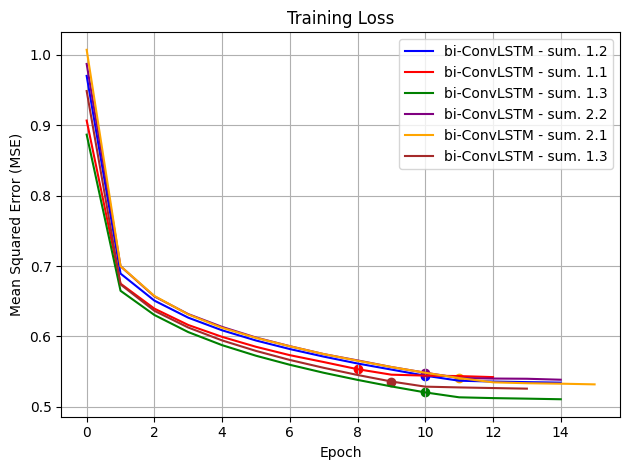

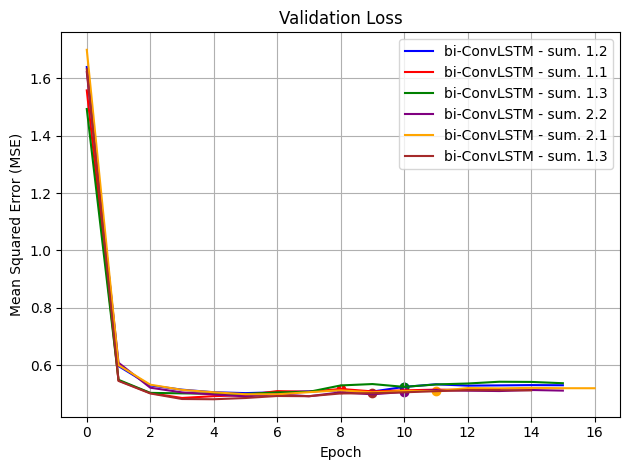

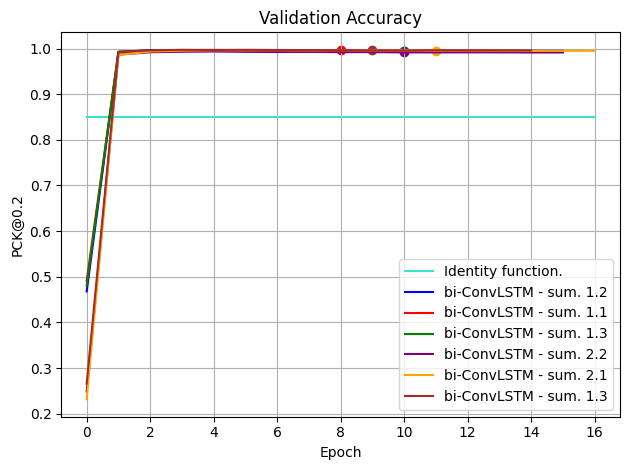

In [7]:
unipose_train_losses = [unipose["train_losses"] for unipose in uniposes]
unipose_val_losses = [unipose["val_losses"] for unipose in uniposes]
unipose_val_accs = [unipose["val_accs"] for unipose in uniposes]
unipose_learning_rates = []
unipose_exps = []
unipose_subexps = []

for unipose_name, unipose in zip(unipose_names, uniposes):
    if unipose["config"]["input_name"] == "input_std" and unipose["config"]["interval_skip"] == 0:
        unipose_subexps.append(1)
    elif unipose["config"]["input_name"] == "input_std" and unipose["config"]["interval_skip"] == 1:
        unipose_subexps.append(3)
    elif unipose["config"]["input_name"] == "input" and unipose["config"]["interval_skip"] == 0:
        unipose_subexps.append(2)
    else:
        print("unipose problem")

    unipose_exps.append(unipose["config"]["noise_scalar"])
    unipose_learning_rates.append(learning_rates[unipose_name])
    
unipose_xs = []
unipose_ys = []

for unipose_learning_rate in unipose_learning_rates:
    xs = []
    ys = []
    
    for x, y in unipose_learning_rate:
        y = y[0]
        if y not in ys:
            xs.append(x)
            ys.append(y)
    
    unipose_xs.append(xs)
    unipose_ys.append(ys)
    
plt.figure()
for i, unipose_train_loss in enumerate(unipose_train_losses):
    color = colors[i]
    exp = unipose_exps[i]
    subexp = unipose_subexps[i]
    model_lr_reduction_xs = unipose_xs[i]
    
    plt.plot(np.arange(len(unipose_train_loss)), unipose_train_loss, c=color, label=f"bi-ConvLSTM - sum. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/unipose/train_losses.png")
plt.show()

plt.figure()
for i, unipose_val_loss in enumerate(unipose_val_losses):
    color = colors[i]
    exp = unipose_exps[i]
    subexp = unipose_subexps[i]
    model_lr_reduction_xs = unipose_xs[i]
    
    plt.plot(np.arange(len(unipose_val_loss)), unipose_val_loss, c=color, label=f"bi-ConvLSTM - sum. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/unipose/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(unipose_val_accs, key=len))), [no_processing_mean] * len(max(unipose_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, unipose_val_acc in enumerate(unipose_val_accs):
    color = colors[i]
    exp = unipose_exps[i]
    subexp = unipose_subexps[i]
    model_lr_reduction_xs = unipose_xs[i]
    
    plt.plot(np.arange(len(unipose_val_acc)), unipose_val_acc, c=color, label=f"bi-ConvLSTM - sum. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/unipose/val_accs.png")
plt.show()

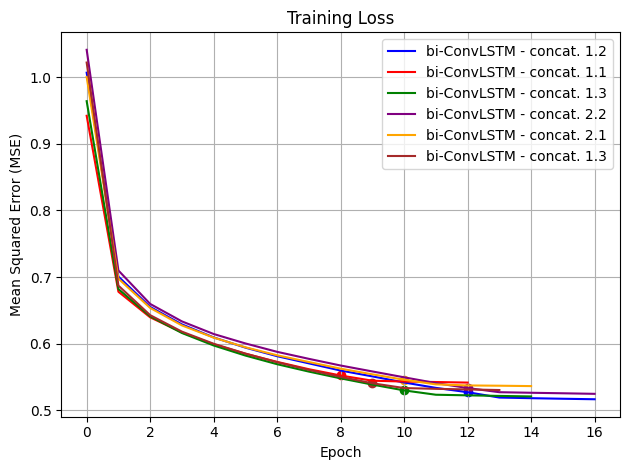

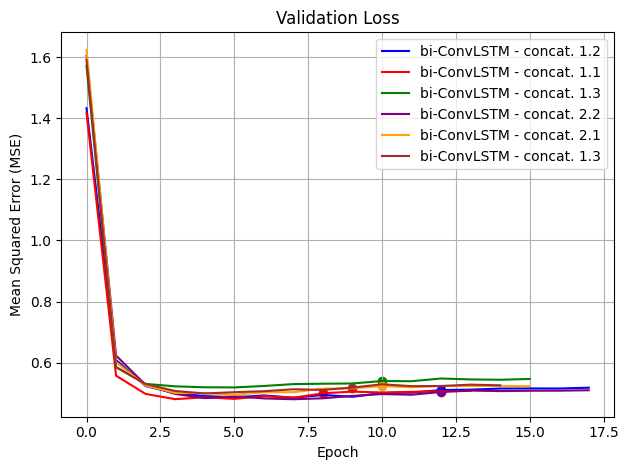

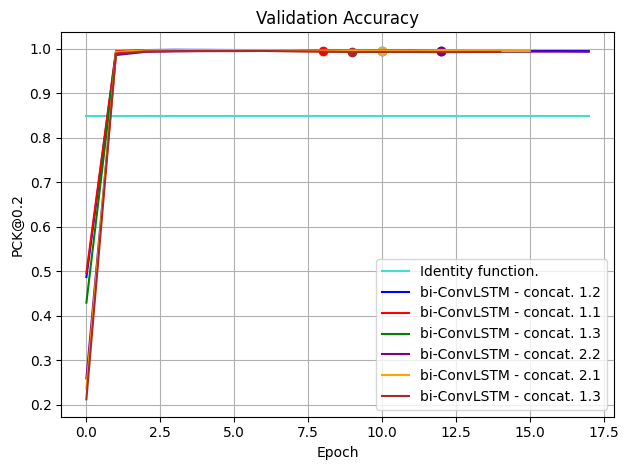

In [8]:

unipose2_train_losses = [unipose2["train_losses"] for unipose2 in uniposes2]
unipose2_val_losses = [unipose2["val_losses"] for unipose2 in uniposes2]
unipose2_val_accs = [unipose2["val_accs"] for unipose2 in uniposes2]
unipose2_learning_rates = []
unipose2_exps = []
unipose2_subexps = []

for unipose2_name, unipose2 in zip(unipose2_names, uniposes2):
    if unipose2["config"]["input_name"] == "input_std" and unipose2["config"]["interval_skip"] == 0:
        unipose2_subexps.append(1)
    elif unipose2["config"]["input_name"] == "input_std" and unipose2["config"]["interval_skip"] == 1:
        unipose2_subexps.append(3)
    elif unipose2["config"]["input_name"] == "input" and unipose2["config"]["interval_skip"] == 0:
        unipose2_subexps.append(2)
    else:
        print("unipose2 problem")

    unipose2_exps.append(unipose2["config"]["noise_scalar"])
    unipose2_learning_rates.append(learning_rates[unipose2_name])
    
unipose2_xs = []
unipose2_ys = []

for unipose2_learning_rate in unipose2_learning_rates:
    xs = []
    ys = []
    
    for x, y in unipose2_learning_rate:
        y = y[0]
        if y not in ys:
            xs.append(x)
            ys.append(y)
    
    unipose2_xs.append(xs)
    unipose2_ys.append(ys)
    
plt.figure()
for i, unipose2_train_loss in enumerate(unipose2_train_losses):
    color = colors[i]
    exp = unipose2_exps[i]
    subexp = unipose2_subexps[i]
    model_lr_reduction_xs = unipose2_xs[i]
    
    plt.plot(np.arange(len(unipose2_train_loss)), unipose2_train_loss, c=color, label=f"bi-ConvLSTM - concat. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose2_train_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Training Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/unipose2/train_losses.png")
plt.show()

plt.figure()
for i, unipose2_val_loss in enumerate(unipose2_val_losses):
    color = colors[i]
    exp = unipose2_exps[i]
    subexp = unipose2_subexps[i]
    model_lr_reduction_xs = unipose2_xs[i]
    
    plt.plot(np.arange(len(unipose2_val_loss)), unipose2_val_loss, c=color, label=f"bi-ConvLSTM - concat. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose2_val_loss[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Loss")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/unipose2/val_losses.png")
plt.show()

plt.figure()
plt.plot(np.arange(0, len(max(unipose2_val_accs, key=len))), [no_processing_mean] * len(max(unipose2_val_accs, key=len)), c="turquoise", label="Identity function.")

for i, unipose2_val_acc in enumerate(unipose2_val_accs):
    color = colors[i]
    exp = unipose2_exps[i]
    subexp = unipose2_subexps[i]
    model_lr_reduction_xs = unipose2_xs[i]
    
    plt.plot(np.arange(len(unipose2_val_acc)), unipose2_val_acc, c=color, label=f"bi-ConvLSTM - concat. {exp}.{subexp}")
    
    for model_lr_reduction_x in model_lr_reduction_xs:
        if model_lr_reduction_x - 2 < 1:
            continue
        
        plt.scatter(model_lr_reduction_x - 2, unipose2_val_acc[model_lr_reduction_x - 2], c=color)
    
plt.title("Validation Accuracy")
plt.ylabel("PCK@0.2")
plt.xlabel("Epoch")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./finetuned/unipose2/val_accs.png")
plt.show()